# Assignment 4 - Simple Linear Regression

### Predicting Delivery Time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
delivery_data = pd.read_csv('delivery_time.csv')
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


###### EDA

In [3]:
delivery_data.shape

(21, 2)

In [4]:
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
delivery_data.describe(include='all')

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


###### Visualising the Data

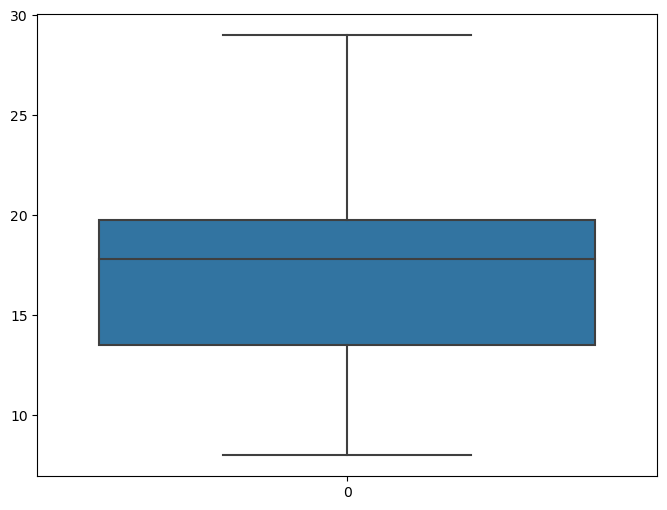

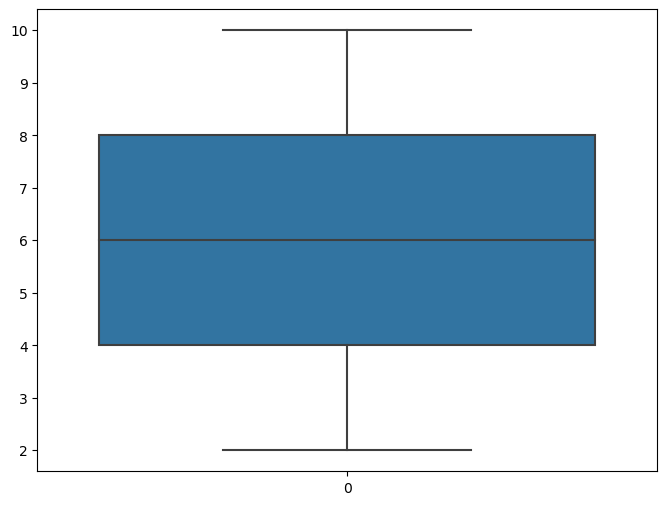

In [7]:
# Checking for outliers with help of boxplot in Delivery Time Column
plt.figure(figsize = (8, 6))
plt.tight_layout()
snb.boxplot(delivery_data['Delivery Time'])
plt.show()


# Checking for outliers with help of boxplot in Sorting Time Column
plt.figure(figsize = (8, 6))
plt.tight_layout()
snb.boxplot(delivery_data['Sorting Time'])
plt.show()

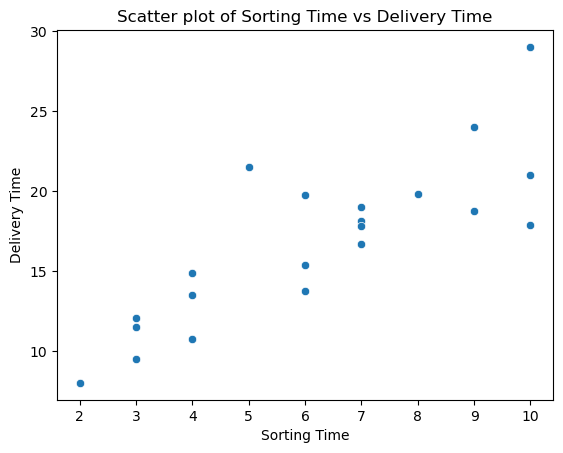

In [8]:
snb.scatterplot(x='Sorting Time', y='Delivery Time', data=delivery_data)
plt.title('Scatter plot of Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

### Applying Log Transformation to Delivery Data

In [9]:
delivery_data['Sorting Time'] = np.log(delivery_data['Sorting Time'])

###### Splitting & Training the Model

In [10]:
delv_features = delivery_data[['Sorting Time']]
delv_features

,Sorting Time
0,2.302585
1,1.386294
2,1.791759
3,2.197225
4,2.302585
5,1.791759
6,1.945910
7,1.098612
8,2.302585
9,2.197225


In [11]:
delv_target = delivery_data[['Delivery Time']]
delv_target

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
delv_x_train, delv_x_test, delv_y_train, delv_y_test = train_test_split(delv_features, delv_target, test_size=0.75, random_state=20)

In [14]:
model = LinearRegression()

In [15]:
model.fit(delv_x_train, delv_y_train)

LinearRegression()

In [16]:
delv_y_pred = model.predict(delv_x_test)

In [17]:
delv_mse = mean_squared_error(delv_y_test, delv_y_pred)
delv_mse

9.38169987520934

In [18]:
delv_r2 = r2_score(delv_y_test, delv_y_pred)
delv_r2

0.5872489396902465

In [41]:
print(f'Mean Squared Error: {delv_mse}')
print(f'Rsquared (R^2): {delv_r2}')

Mean Squared Error: 9.38169987520934
Rsquared (R^2): 0.5872489396902465


In [19]:
coefficient = model.coef_
coefficient

array([[10.70388062]])

In [20]:
intercept = model.intercept_
intercept

array([-2.11890653])

###### Visualising the Regression Line

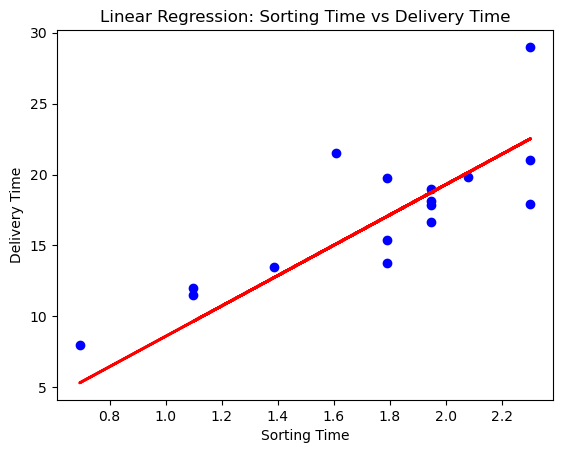

In [21]:
plt.scatter(delv_x_test, delv_y_test, color='blue')
plt.plot(delv_x_test, delv_y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()


### Predicting Salary Hike

In [22]:
sal_data = pd.read_csv('Salary_Data.csv')
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


###### EDA

In [23]:
sal_data.shape

(30, 2)

In [24]:
sal_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [25]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [26]:
sal_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


###### Visualising the Data

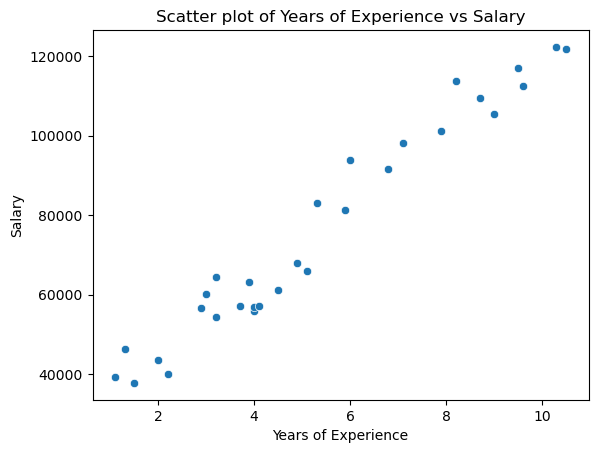

In [27]:
snb.scatterplot(x='YearsExperience', y='Salary', data=sal_data)
plt.title('Scatter plot of Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

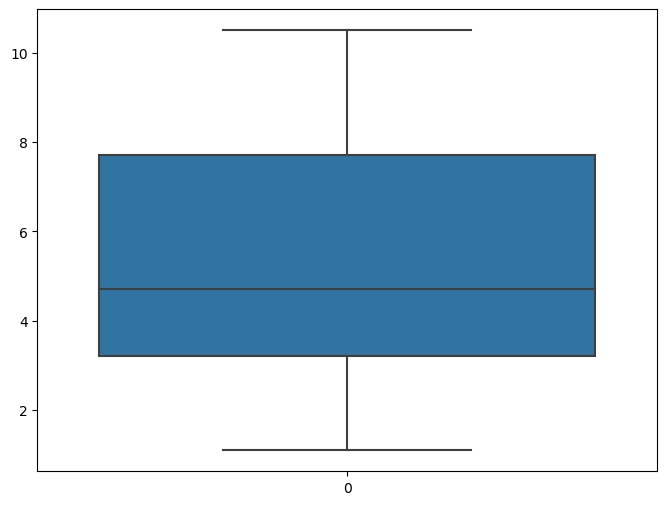

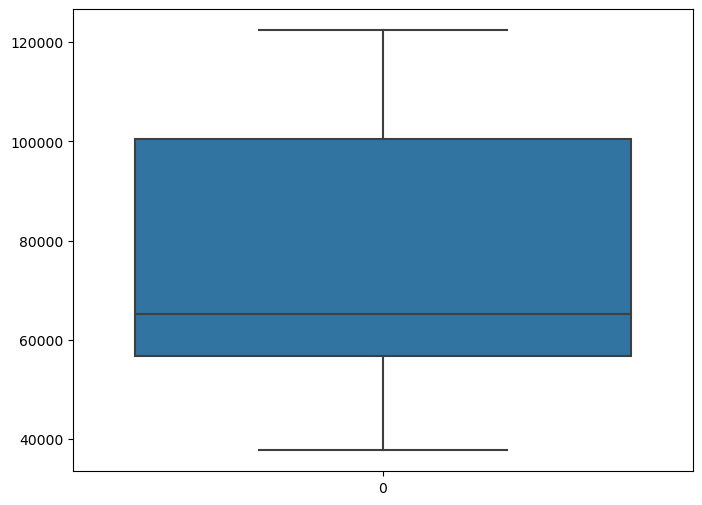

In [28]:
# Checking for outliers with help of boxplot in YearsExperience Column
plt.figure(figsize = (8, 6))
plt.tight_layout()
snb.boxplot(sal_data['YearsExperience'])
plt.show()


# Checking for outliers with help of boxplot in Salary Column
plt.figure(figsize = (8, 6))
plt.tight_layout()
snb.boxplot(sal_data['Salary'])
plt.show()

### Applying Log Transformation to Salary Data

In [29]:
sal_data['YearsExperience'] = np.log(sal_data['YearsExperience'])

###### Splitting & Training the Model

In [30]:
sal_features = sal_data[['YearsExperience']]
sal_features

,YearsExperience
0,0.095310
1,0.262364
2,0.405465
3,0.693147
4,0.788457
5,1.064711
6,1.098612
7,1.163151
8,1.163151
9,1.308333


In [31]:
sal_target = sal_data[['Salary']]
sal_target

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [32]:
sal_x_train, sal_x_test, sal_y_train, sal_y_test = train_test_split(sal_features, sal_target, test_size=0.75, random_state=20)

In [33]:
sal_model = LinearRegression()

In [34]:
sal_model.fit(sal_x_train, sal_y_train)

LinearRegression()

In [35]:
sal_y_pred = sal_model.predict(sal_x_test)

In [36]:
sal_mse = mean_squared_error(sal_y_test, sal_y_pred)
sal_mse

198436319.9153826

In [37]:
sal_r2 = r2_score(sal_y_test, sal_y_pred)
sal_r2

0.711338609770167

In [42]:
print(f'Mean Squared Error: {sal_mse}')
print(f'Rsquared (R^2): {sal_r2}')

Mean Squared Error: 198436319.9153826
Rsquared (R^2): 0.711338609770167


In [38]:
sal_coefficient = sal_model.coef_
sal_coefficient

array([[51946.60055589]])

In [39]:
sal_intercept = sal_model.intercept_
sal_intercept

array([-5809.46347204])

###### Visualising the Regression Line

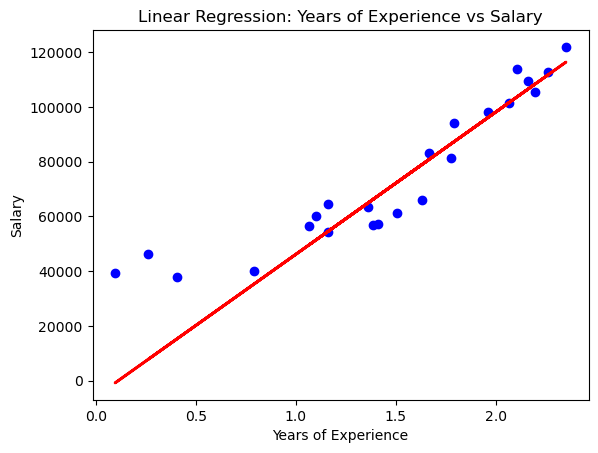

In [40]:
plt.scatter(sal_x_test, sal_y_test, color='blue')
plt.plot(sal_x_test, sal_y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

###### Note: If we want to increase the score of model then we can do changes in train_size & random_state for better results